# Analysis
In this section, I will perform different analysis on the whole dataset.

First I will compare Fitbit Sleep Data with SleepScore Data

In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime as dt
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_pickle('../data/all.csv')

In [3]:
df.head()

,Date,Mood,Mood_num,Mood_bin,Mood_bin_num,Time,Day,Entertainment,Exercise,Family,...,SS_SE,SS_SMI,SS_AI,SS_REMP,SS_SWSP,SS_Onset,SS_Offset,SS_TSDP,SS_Midpoint,SS_SleepRegularity
0,2022-09-30,Good,3,Good,1,16.100000,Friday,0,1,0,...,89.57,93.429158,0.79,19.56,33.41,23.412778,7.529444,487.0,4.058333,NaN
1,2022-10-01,Okay,2,Bad,0,16.200000,Saturday,0,0,0,...,86.17,89.254598,1.17,20.82,24.30,22.703889,7.312222,516.5,4.304167,NaN
2,2022-10-02,Bad,1,Bad,0,20.750000,Sunday,0,0,1,...,88.69,91.880781,0.81,23.71,21.25,22.871667,6.980000,486.5,4.054167,0.143150
3,2022-10-03,Terrific,4,Good,1,18.350000,Monday,0,1,1,...,84.05,93.835616,0.44,7.54,30.66,23.584722,6.884722,438.0,3.650000,0.270951
4,2022-10-04,Terrific,4,Good,1,22.733333,Tuesday,0,0,0,...,93.56,95.094340,0.95,19.58,31.22,24.640833,7.265833,397.5,3.953333,0.236354


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 42
Data columns (total 77 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       43 non-null     datetime64[ns]
 1   Mood                       43 non-null     category      
 2   Mood_num                   43 non-null     int8          
 3   Mood_bin                   43 non-null     category      
 4   Mood_bin_num               43 non-null     int8          
 5   Time                       43 non-null     float64       
 6   Day                        43 non-null     object        
 7   Entertainment              43 non-null     uint8         
 8   Exercise                   43 non-null     uint8         
 9   Family                     43 non-null     uint8         
 10  Food                       43 non-null     uint8         
 11  Friends                    43 non-null     uint8         
 12  Hobby     

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 42
Data columns (total 77 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       43 non-null     datetime64[ns]
 1   Mood                       43 non-null     category      
 2   Mood_num                   43 non-null     int8          
 3   Mood_bin                   43 non-null     category      
 4   Mood_bin_num               43 non-null     int8          
 5   Time                       43 non-null     float64       
 6   Day                        43 non-null     object        
 7   Entertainment              43 non-null     uint8         
 8   Exercise                   43 non-null     uint8         
 9   Family                     43 non-null     uint8         
 10  Food                       43 non-null     uint8         
 11  Friends                    43 non-null     uint8         
 12  Hobby     

In [6]:
df.IsWeekend = df.IsWeekend.astype('bool')

In [10]:
fb_sleep = [col[3:] for col in df.columns if 'FB_' in col]

In [11]:
fb_sleep

['Onset',
 'Offset',
 'TST',
 'WASO',
 'NOA',
 'TIB',
 'REMSD',
 'LSD',
 'DSD',
 'TSDP',
 'AI',
 'SWSP',
 'REMP',
 'SMI',
 'Midpoint',
 'SleepRegularity']

In [12]:
df_diff = pd.DataFrame()
for col in fb_sleep:
    df_diff[col] = df['SS_' + col] - df['FB_' + col]

In [13]:
df_diff

,Onset,Offset,TST,WASO,NOA,TIB,REMSD,LSD,DSD,TSDP,AI,SWSP,REMP,SMI,Midpoint,SleepRegularity
0,0.229444,-0.003889,8.0,-22.0,-27.0,7.0,9.0,-63.0,62.0,-14.0,-3.639530,13.275772,1.662908,4.207601,-0.116667,NaN
1,0.153889,-0.037778,24.0,-41.0,-23.0,7.0,12.0,-45.0,56.0,-11.5,-3.223593,11.485355,1.598032,6.489447,-0.095833,NaN
2,0.121667,0.113333,21.0,-30.0,-22.0,17.0,2.0,-18.0,37.0,-0.5,-3.133662,7.634977,-0.703146,4.406448,-0.004167,-0.030522
3,0.434722,0.301389,29.0,-42.0,-25.0,43.0,-22.0,6.0,44.0,-8.0,-3.957906,9.194031,-6.334346,8.185392,-0.066667,-0.014052
4,0.057500,0.015833,26.0,-30.0,-14.0,4.0,0.0,-23.0,48.0,-2.5,-2.459091,11.333636,-1.442727,7.094340,0.036667,-0.022020
5,0.096389,-0.011944,-5.0,-2.0,-21.0,1.0,-3.0,-16.0,14.0,-6.5,-2.934673,3.588224,-0.458037,0.066031,-0.054167,-0.018338
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018338
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.017714
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.032724
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.080853


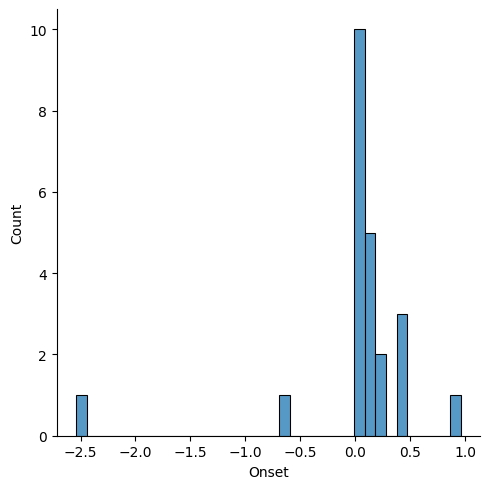

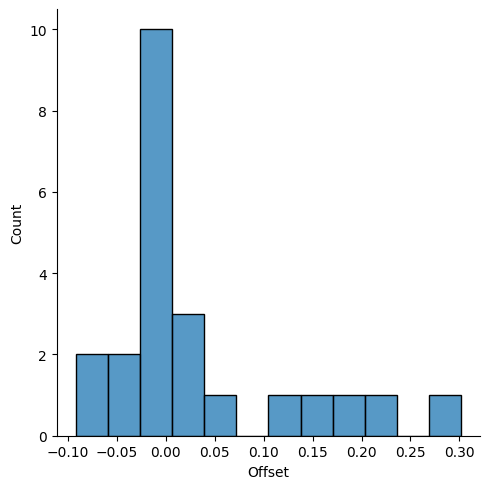

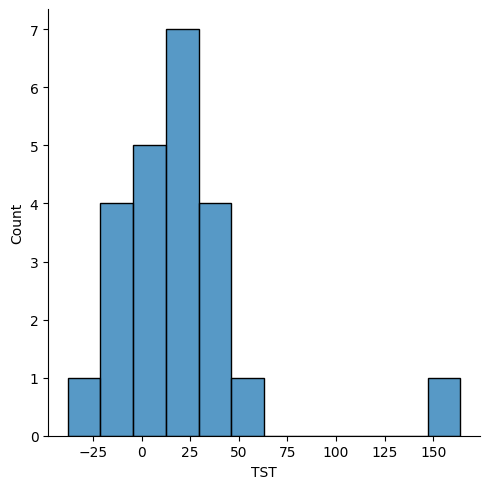

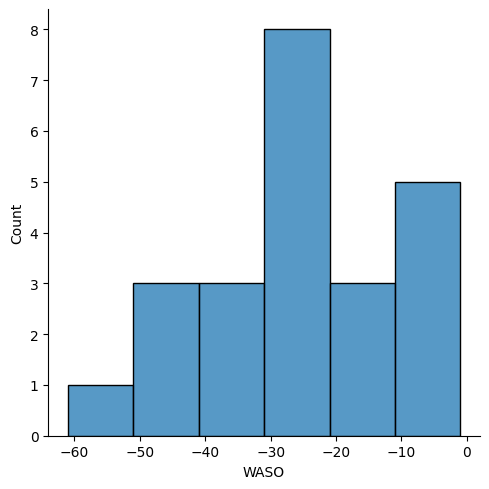

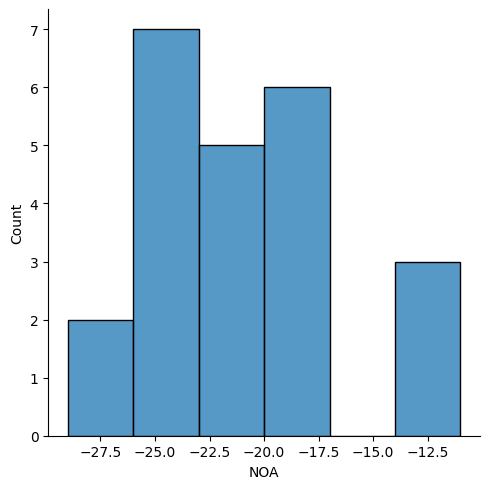

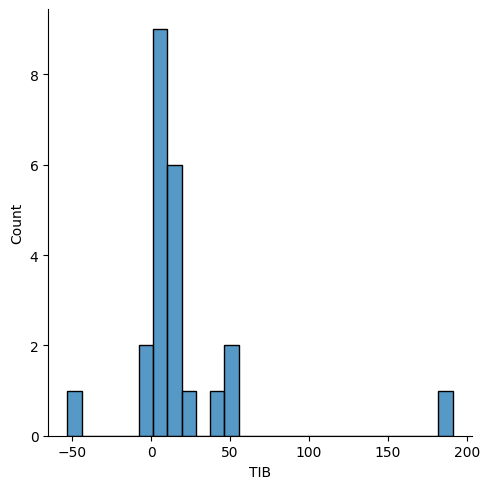

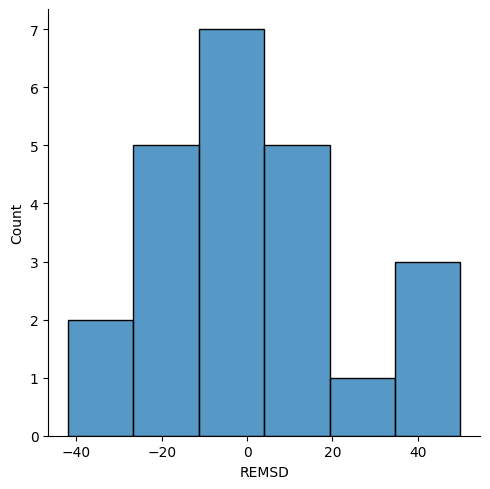

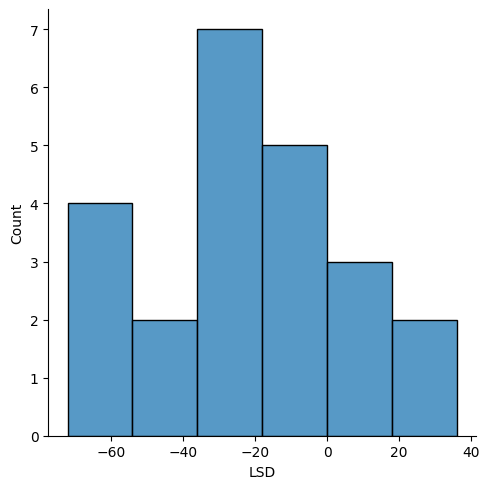

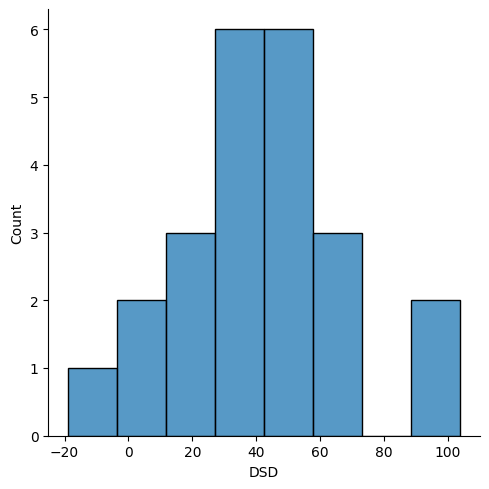

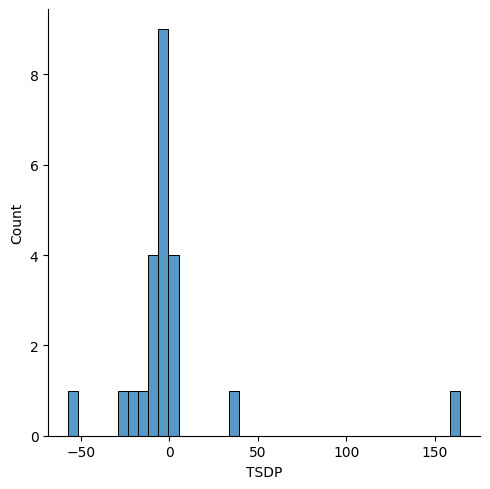

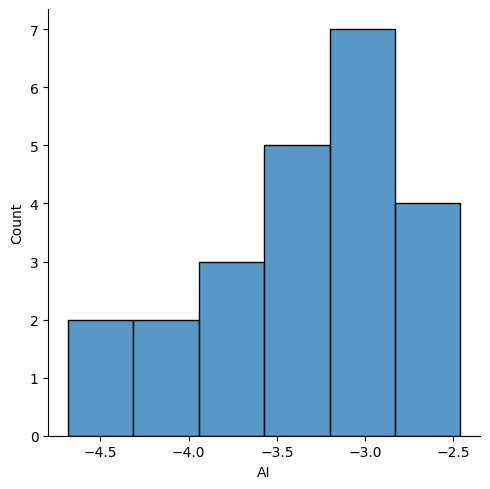

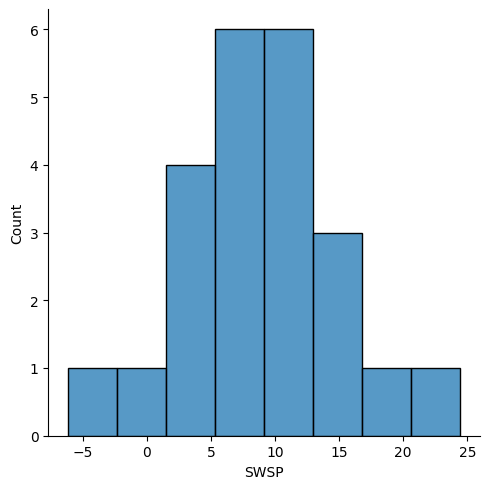

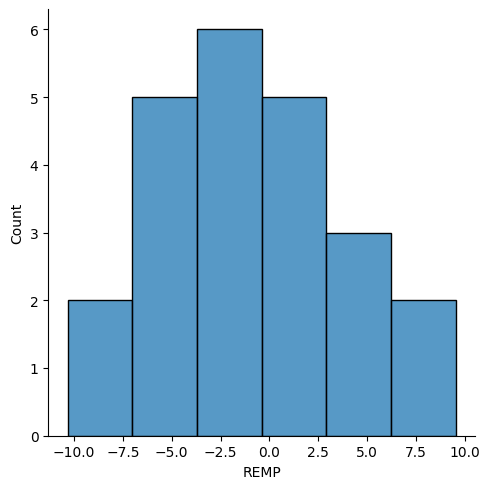

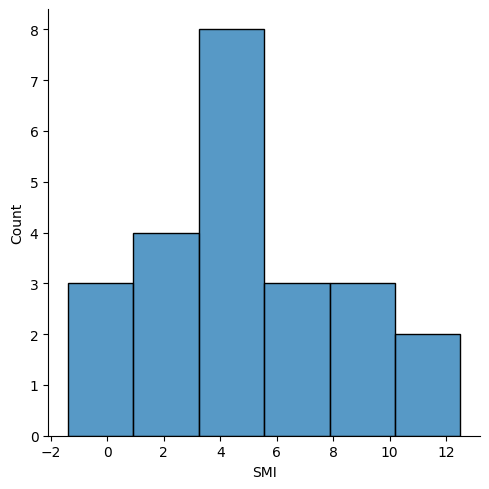

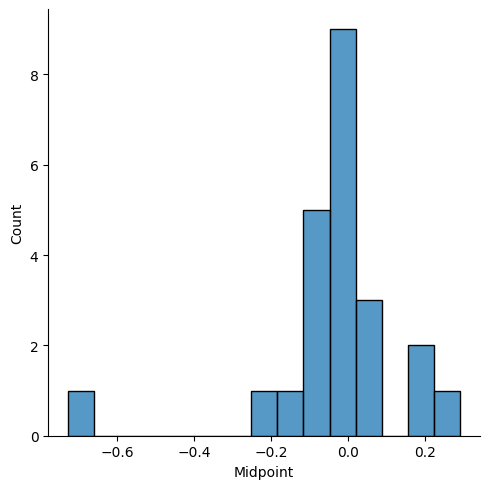

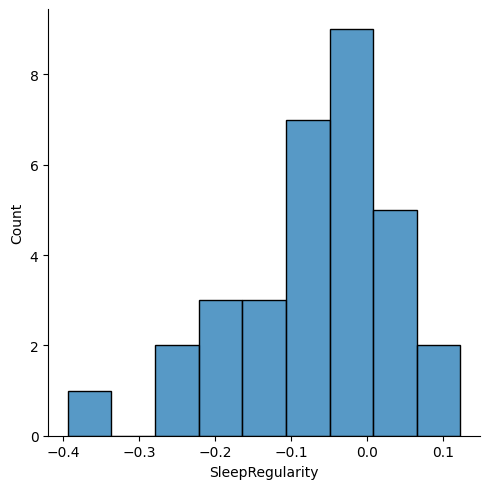

In [14]:
for col in df_diff.columns:
    sns.displot(data=df_diff, x=col)

In [18]:
sleep = [col for col in df.columns if 'Onset' in col or 'Offset' in col or 'Date' in col]
df.loc[df_diff.TIB > 150, sleep]

,Date,FB_Onset,FB_Offset,SS_Onset,SS_Offset
41,2022-11-10,26.1,7.866667,23.560278,8.068611


In [18]:
sleep = [col for col in df.columns if 'Onset' in col or 'Offset' in col or 'Date' in col]
df.loc[df_diff.TIB > 150, sleep]

,Date,FB_Onset,FB_Offset,SS_Onset,SS_Offset
41,2022-11-10,26.1,7.866667,23.560278,8.068611
